In [8]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

# Read data
train = pd.read_csv("/home/charmi/Documents/Small_Projects/Digit_Recognizer/train.csv")
labels = train.iloc[:,0].values.astype('int32')
X_train = (train.iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv("/home/charmi/Documents/Small_Projects/Digit_Recognizer/test.csv").values).astype('float32')

# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(labels) 

# pre-processing: divide by max and substract mean
scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.std(X_train)
X_train -= mean
X_test -= mean

input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]


k = range(1, 10)
accuracy = []

for i in k:
    print('k = %s begin,' % (i))
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
   


k = 1 begin,
k = 2 begin,
k = 3 begin,
k = 4 begin,
k = 5 begin,
k = 6 begin,
k = 7 begin,
k = 8 begin,
k = 9 begin,


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


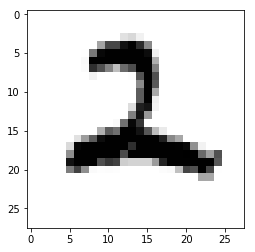

IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:

import matplotlib.pyplot as plt

d = X_test[78]
d.shape=(28, 28)
plt.imshow(225-d,cmap = 'gray')
print(model.predict([X_test[78]]))
plt.show()

preds = model.predict(X_test)

a = np.array(preds)
b = [np.where(r==1)[0][0] for r in a]



def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(b)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "KNN_10_final.csv")